<a href="https://colab.research.google.com/github/pyayivargitam/Infosys-Assignments/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-4
# Understand and implement model evaluation using cross-validation and improve model performance by hyperparameter tuning.

**Import Libraries and Load Data**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Step 2: Load Dataset and Prepare Features and Target**

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

print("Feature Matrix Shape:", X.shape)
print("Target Vector Shape:", y.shape)

print("\nFeatures (first 5 rows):")
print(X.head())

print("\nTarget (first 5 values):")
print(y.head())

Feature Matrix Shape: (150, 4)
Target Vector Shape: (150,)

Features (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (first 5 values):
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


**Step 3: Implement Cross-Validation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
log_reg = LogisticRegression(max_iter=200)

cv_scores = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Accuracy Standard Deviation:", np.std(cv_scores))

Cross-Validation Accuracy Scores: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
Mean Accuracy: 0.9733333333333334
Accuracy Standard Deviation: 0.03265986323710904


**Step 4: Hyperparameter Tuning with GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(max_iter=500)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga']
}

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 0.01, 'penalty': None, 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.9800000000000001


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

**Step 5: Evaluate Best Model on Full Dataset**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Final Accuracy on Full Dataset: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



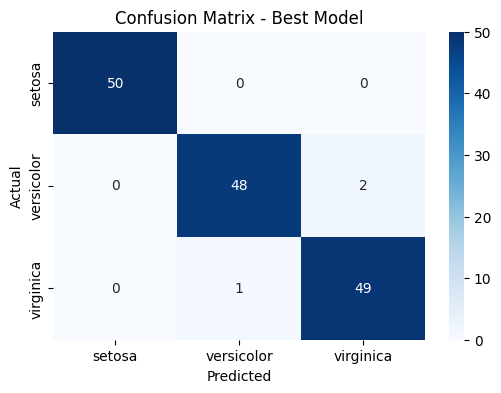

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_model = grid_search.best_estimator_

best_model.fit(X, y)

y_pred = best_model.predict(X)

print("Final Accuracy on Full Dataset:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model")
plt.show()